In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Import for splitting data into train & test for the ML models
from sklearn.model_selection import train_test_split

# Import ENR
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score

# Import standard scaler for scaling the data
from sklearn.preprocessing import StandardScaler

# Import metrics to calculate accuracy of models
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read the cleaned country data CSV file
df = pd.read_csv("../Resources/merged_df.csv", encoding ="unicode_escape")
world_df = df.copy()
world_df.head()

,country_name,Year,urbanization,gdp_per_cap,inflation,gdp_current,unemployment,literacy_adult,health_exp,literacy_youth,life_exp,re_consumption,ff_consumption,energy_use
0,Canada,1971,76.090,4520.162878,2.704918,9.927196e+10,6.400000,81.228489,6.204456,88.205112,73.029268,30.497158,84.154154,6436.226256
1,Afghanistan,1971,12.021,166.224831,25.565204,1.831109e+09,8.118803,81.228489,6.204456,88.205112,37.923000,30.497158,65.539705,2326.432009
2,Albania,1971,31.933,10212.316586,25.565204,2.063322e+11,8.118803,81.228489,6.204456,88.205112,65.618000,30.497158,74.660703,785.161526
3,Algeria,1971,39.665,359.824582,2.626642,5.077222e+09,8.118803,81.228489,6.204456,88.205112,43.670000,30.497158,98.999816,245.527602
4,American Samoa,1971,70.784,10212.316586,25.565204,2.063322e+11,8.118803,81.228489,6.204456,88.205112,66.294149,30.497158,65.539705,2326.432009


### Elastic Net Regression

In [12]:
# Setting features dataframe and target vector
X = world_df.drop(["gdp_current", "country_name", "Year", "gdp_per_cap"], axis=1)
y = world_df["gdp_current"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Elastic Net model
enr = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=1000)
enr.fit(X_train, y_train)

# Make predictions on test set
y_pred = enr.predict(X_test)

# Calculate R2 scores for training and test sets
train_score = enr.score(X_train, y_train)
test_score = r2_score(y_test, y_pred)

In [13]:
print("Model's Performance on Testing Data (20% of all data).\n")
print("Evaluation metrics of World's Data (1971-2021)")
print("====================")
# Evaluate the accuracy of the model using r2_score
r2 = r2_score(y_test, y_pred)
print("Test r2 score:", np.round(test_score * 100, 2))

Model's Performance on Testing Data (20% of all data).

Evaluation metrics of World's Data (1971-2021)
Test r2 score: 7.89


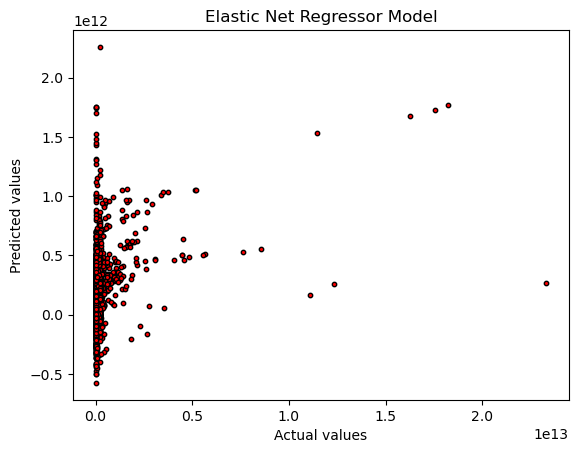

In [14]:
# Plot the Elastic Net Regressor of training data
plt.scatter(y_test,y_pred, s=10, c='red', edgecolor='black',)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Elastic Net Regressor Model')
plt.show()

In [15]:
print("Model's Performance on Training Data (80% of all data).\n")
print("Evaluation metrics of World's Data (1971-2021)")
print("====================")

# Calculate the r2_score of ENR model
print(f"R2 Score: {np.round(train_score * 100, 2)}%")

Model's Performance on Training Data (80% of all data).

Evaluation metrics of World's Data (1971-2021)
R2 Score: 8.97%


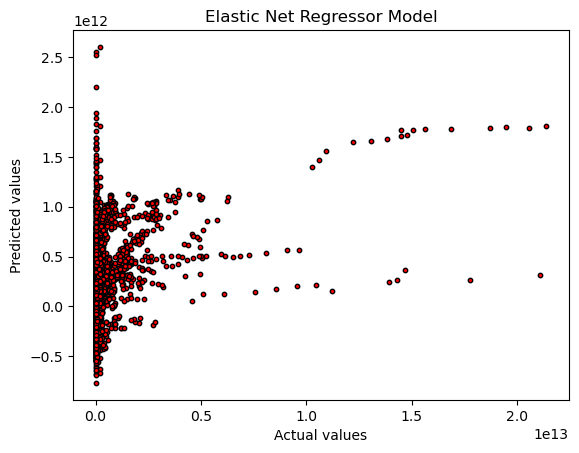

In [7]:
y_pred = enr.predict(X_train)
# Plot the Elastic Net Regressor of testing data
plt.scatter(y_train,y_pred, s=10, c='red', edgecolor='black',)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Elastic Net Regressor Model')
plt.show()